In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn import preprocessing

### Importing OTU table, normalization (change to relative abundances), set training and testing groups

In [35]:
# Import data into a pandas dataframe
otu_table = pd.read_csv('EGAD00001003453.otu_table.99.denovo', sep='\t', header=0, index_col=0)

#Transpose OTU table so that samples are rows and OTUs are columns
otu_table = otu_table.T

#Convert to relative abundances
#Normalize each person to 1 (change to relative abundances)
otu_table_normalized = otu_table.div(otu_table.sum(axis=1), axis=0)
print(otu_table_normalized)

OTU_ID  denovo7709  denovo5395  denovo11322  denovo44859  denovo44858  \
G37960    0.000000         0.0          0.0          0.0          0.0   
G37961    0.000000         0.0          0.0          0.0          0.0   
G37962    0.000000         0.0          0.0          0.0          0.0   
G37963    0.000000         0.0          0.0          0.0          0.0   
G37964    0.000000         0.0          0.0          0.0          0.0   
G37965    0.000000         0.0          0.0          0.0          0.0   
G37966    0.000000         0.0          0.0          0.0          0.0   
G37967    0.000000         0.0          0.0          0.0          0.0   
G37968    0.000000         0.0          0.0          0.0          0.0   
G37969    0.000000         0.0          0.0          0.0          0.0   
G37970    0.000000         0.0          0.0          0.0          0.0   
G37971    0.000000         0.0          0.0          0.0          0.0   
G37972    0.000000         0.0          0.0        

In [36]:
#Make training and testing sets (50/50 for now)

#Scramble existing table with hard-coded random seed
otu_table_normalized = otu_table_normalized.sample(frac=1, random_state=1)

#Make first half training and second half testing
total_people = otu_table_normalized.shape[0]
print(total_people)
midway = total_people/2
training_table = otu_table.iloc[0:int(midway)]
testing_table = otu_table.iloc[int(midway):]


1010


### Set conditions to test:

In [ ]:
N = [5, 10, 50, 100, 250]
weight_setup = ['even', 'uneven_100x', 'uneven_10x', 'uneven_graduated', 'uneven_bins']

#Number of times to run each condition (N and weight setup)
num_repeats = 5

In [5]:
#Choose number of samples
num_samples = 5

#Choose num_samples random people from the study, with replacement
random_sample = training_table.sample(n=num_samples, replace=True)
print(random_sample)

OTU_ID  denovo7709  denovo5395  denovo11322  denovo44859  denovo44858  \
G37987           0           0            0            0            0   
G37988           0           0            0            0            0   
G43187           0           0            0            0            0   
G43093           0           0            0            0            0   
G43242           0           0            0            0            0   

OTU_ID  denovo41472  denovo41473  denovo41470  denovo41471  denovo41476  \
G37987            0            0            0            0            0   
G37988            0            0            0            0            0   
G43187            0            0            0            0            0   
G43093            0            0            0            0            0   
G43242            0            0            0            0            0   

OTU_ID     ...       denovo22212  denovo19194  denovo32732  denovo7356  \
G37987     ...                 0    

In [7]:
#Make into numpy array
numpy_array = random_sample.values
print(numpy_array)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [23]:
random_sample * pd.Series([0.8, 0.1, 0.1, 0.1, 0.1])

/Users/Diana_Gong/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/base.py:3772: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  return this.join(other, how=how, return_indexers=return_indexers)


,denovo7709,denovo5395,denovo11322,denovo44859,denovo44858,denovo41472,denovo41473,denovo41470,denovo41471,denovo41476,...,denovo22219,denovo22218,denovo43272,denovo32739,denovo32738,0,1,2,3,4
G37987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
G37988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
G43187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
G43093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
G43242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [9]:
#Take column means (mean OTU relative abundance across all sampled people)
#Even mixing
even_mean = numpy_array_normalized.mean(axis=0)
print(even_mean)


[0. 0. 0. ... 0. 0. 0.]


In [10]:
#Uneven mixing: Repeat first person in sample num_samples*5 times, and calculate the new mean (this is in essence a weighted mean)
repeats = np.tile(numpy_array_normalized[0], (num_samples*5,1))
print(repeats)

uneven_array = np.vstack((numpy_array_normalized,repeats))
uneven_mean = uneven_array.mean(axis=0)
print(uneven_mean)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[0. 0. 0. ... 0. 0. 0.]


In [11]:
#Put even and uneven means back into one dataframe
mean_df = pd.DataFrame(even_mean, columns=['even'], index=random_sample.columns)
mean_df['uneven'] = uneven_mean


In [12]:
print(mean_df)

                 even    uneven
OTU_ID                         
denovo7709   0.000000  0.000000
denovo5395   0.000000  0.000000
denovo11322  0.000000  0.000000
denovo44859  0.000000  0.000000
denovo44858  0.000000  0.000000
denovo41472  0.000000  0.000000
denovo41473  0.000000  0.000000
denovo41470  0.000000  0.000000
denovo41471  0.000000  0.000000
denovo41476  0.000000  0.000000
denovo12514  0.000000  0.000000
denovo12517  0.000000  0.000000
denovo41475  0.000000  0.000000
denovo12519  0.000000  0.000000
denovo11297  0.000000  0.000000
denovo41478  0.000000  0.000000
denovo41479  0.000000  0.000000
denovo43271  0.000000  0.000000
denovo35426  0.000000  0.000000
denovo35427  0.000000  0.000000
denovo35424  0.000000  0.000000
denovo35425  0.000023  0.000004
denovo35422  0.000000  0.000000
denovo34759  0.000000  0.000000
denovo35420  0.000000  0.000000
denovo35421  0.000000  0.000000
denovo35428  0.000000  0.000000
denovo35429  0.000000  0.000000
denovo15147  0.000000  0.000000
denovo24

In [13]:
nonzero_mean = mean_df.loc[(mean_df!=0).any(axis=1)]
print (nonzero_mean.shape)

(4295, 2)


In [14]:
start = time.time()
plt.hist(nonzero_mean)
print (time.time()-start)

KeyboardInterrupt: 

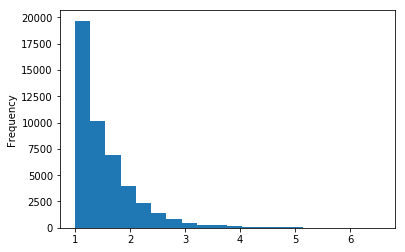

In [28]:
%matplotlib inline
otu_table.sum().apply(np.log10).plot(kind='hist', bins=20)

In [32]:
sum(otu_table.sum() <= 100)

39450